In [274]:
# <1> 
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np

from gc import collect


from matplotlib import patheffects as path_effects
import matplotlib.pyplot as plt

from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.cluster import KMeans
from folium.plugins import HeatMap

import folium

In [275]:
# load three datasets of fatal crash
column_list= ['Report Number','Collision Type','Weather','Light','ACRS Report Type','Crash Date','Crash Time','Driver Substance Abuse']
df_I = pd.read_csv("Crash_Reporting_IncidentsData_Part.csv")

In [276]:
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 46 columns):
Report Number                   174 non-null object
Local Case Number               174 non-null int64
Agency Name                     174 non-null object
ACRS Report Type                174 non-null object
Unnamed: 4                      0 non-null float64
Crash Date                      174 non-null object
Crash Time                      174 non-null object
Hit/Run                         174 non-null object
Route Type                      168 non-null object
Mile Point                      169 non-null float64
Mile Point Direction            168 non-null object
Lane Direction                  170 non-null object
Lane Number                     174 non-null int64
Lane Type                       11 non-null object
Number of Lanes                 174 non-null int64
Direction                       169 non-null object
Distance                        170 non-null float64
Distance Unit 

In [277]:
df_N = pd.read_csv("Crash_Reporting_NonMotoristsData_Part.csv")
df_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 32 columns):
Report Number                       77 non-null object
Local Case Number                   77 non-null int64
Agency Name                         77 non-null object
ACRS Report Type                    77 non-null object
Crash Date/Time                     77 non-null object
Route Type                          72 non-null object
Road Name                           73 non-null object
Cross-Street Type                   72 non-null object
Cross-Street Name                   73 non-null object
Off-Road Description                4 non-null object
Municipality                        13 non-null object
Related Non-Motorist                77 non-null object
Collision Type                      77 non-null object
Weather                             72 non-null object
Surface Condition                   70 non-null object
Light                               77 non-null object
Traffic Control    

In [278]:
df_N['Pedestrian Type'].value_counts()

PEDESTRIAN          66
BICYCLIST            8
OTHER CONVEYANCE     2
OTHER                1
Name: Pedestrian Type, dtype: int64

In [279]:
df_D = pd.read_csv("Crash_Reporting_DriversData_Part.csv")
df_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 43 columns):
Report Number                     247 non-null object
Local Case Number                 247 non-null int64
Agency Name                       247 non-null object
ACRS Report Type                  247 non-null object
Crash Date/Time                   247 non-null object
Route Type                        242 non-null object
Road Name                         244 non-null object
Cross-Street Type                 242 non-null object
Cross-Street Name                 244 non-null object
Off-Road Description              3 non-null object
Municipality                      33 non-null object
Related Non-Motorist              79 non-null object
Collision Type                    247 non-null object
Weather                           224 non-null object
Surface Condition                 241 non-null object
Light                             247 non-null object
Traffic Control                   20

## Observation: 174 fatal incidents involved 247 drivers, and 77 non-motorists. Let's merge driver dataset and Incidents dataset. 

In [280]:
merged = df_D.merge(df_I, on='Report Number', how='inner')

In [281]:
merged.head(1)

,Report Number,Local Case Number_x,Agency Name_x,ACRS Report Type_x,Crash Date/Time,Route Type_x,Road Name_x,Cross-Street Type_x,Cross-Street Name_x,Off-Road Description_x,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude_y,Longitude_y,Location_y
0,MCP2683003M,190006583,Montgomery County Police,Fatal Crash,2/10/2019 18:47,County,MONTGOMERY VILLAGE AVE,Maryland (State),MIDCOUNTY HWY,NaN,...,NaN,INTERSECTION,T-INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.157968,-77.201475,"(39.15796833, -77.201475)"


In [282]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 88 columns):
Report Number                     247 non-null object
Local Case Number_x               247 non-null int64
Agency Name_x                     247 non-null object
ACRS Report Type_x                247 non-null object
Crash Date/Time                   247 non-null object
Route Type_x                      242 non-null object
Road Name_x                       244 non-null object
Cross-Street Type_x               242 non-null object
Cross-Street Name_x               244 non-null object
Off-Road Description_x            3 non-null object
Municipality_x                    33 non-null object
Related Non-Motorist_x            79 non-null object
Collision Type_x                  247 non-null object
Weather_x                         224 non-null object
Surface Condition_x               241 non-null object
Light_x                           247 non-null object
Traffic Control_x                 20

In [283]:
merged.head(5)

,Report Number,Local Case Number_x,Agency Name_x,ACRS Report Type_x,Crash Date/Time,Route Type_x,Road Name_x,Cross-Street Type_x,Cross-Street Name_x,Off-Road Description_x,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude_y,Longitude_y,Location_y
0,MCP2683003M,190006583,Montgomery County Police,Fatal Crash,2/10/2019 18:47,County,MONTGOMERY VILLAGE AVE,Maryland (State),MIDCOUNTY HWY,NaN,...,NaN,INTERSECTION,T-INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.157968,-77.201475,"(39.15796833, -77.201475)"
1,MCP3150000Q,190010125,Montgomery County Police,Fatal Crash,3/4/2019 15:43,Maryland (State),CHERRY HILL RD,Maryland (State),PROSPERITY DR,NaN,...,SIGN SUPPORT POLE,INTERSECTION,T-INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.062090,-76.960157,"(39.06209, -76.96015667)"
2,MCP3150000Q,190010125,Montgomery County Police,Fatal Crash,3/4/2019 15:43,Maryland (State),CHERRY HILL RD,Maryland (State),PROSPERITY DR,NaN,...,SIGN SUPPORT POLE,INTERSECTION,T-INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.062090,-76.960157,"(39.06209, -76.96015667)"
3,MCP20010013,190041758,Montgomery County Police,Fatal Crash,8/31/2019 16:46,County,HAWKESBURY LA,County,BRANDON GREEN DR,NaN,...,CURB,NON INTERSECTION,NaN,NaN,CURVE LEFT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.066535,-77.022475,"(39.06653466, -77.02247501)"
4,MCP12270013,200007223,Montgomery County Police,Fatal Crash,2/12/2020 19:05,Maryland (State),MIDCOUNTY HWY,County,PIER POINT PL,NaN,...,NaN,INTERSECTION,T-INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.159245,-77.198483,"(39.15924546, -77.19848265)"


## For those duplicated columns and columns with lots of null values, I would drop them. 

In [284]:
merged1 = merged.drop(columns =["Light_y",'Surface Condition_y','Non-Motorist Substance Abuse_y','Location_y','Collision Type_y','Driver Substance Abuse_y','Municipality_y','Road Name_y','Traffic Control_y','Weather_y','Related Non-Motorist_y','Local Case Number_y','Road Name_x','Vehicle ID','Road Name_y','Unnamed: 4','Road Name_x','Cross-Street Name_x','Cross-Street Name_y','Crash Date/Time','ACRS Report Type_y','Local Case Number_x','Agency Name_y','Route Type_y','Cross-Street Type_y','Off-Road Description_y','Latitude_y','Longitude_y'])

In [285]:
# A few more data checks
merged1.isnull().sum()

Report Number                       0
Agency Name_x                       0
ACRS Report Type_x                  0
Route Type_x                        5
Cross-Street Type_x                 5
Off-Road Description_x            244
Municipality_x                    214
Related Non-Motorist_x            168
Collision Type_x                    0
Weather_x                          23
Surface Condition_x                 6
Light_x                             0
Traffic Control_x                  47
Driver Substance Abuse_x           20
Non-Motorist Substance Abuse_x    175
Person ID                           0
Driver At Fault                     0
Injury Severity                     0
Circumstance                      221
Driver Distracted By                0
Drivers License State               2
Vehicle Damage Extent               0
Vehicle First Impact Location       0
Vehicle Second Impact Location      0
Vehicle Body Type                   2
Vehicle Movement                    0
Vehicle Cont

In [286]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 62 columns):
Report Number                     247 non-null object
Agency Name_x                     247 non-null object
ACRS Report Type_x                247 non-null object
Route Type_x                      242 non-null object
Cross-Street Type_x               242 non-null object
Off-Road Description_x            3 non-null object
Municipality_x                    33 non-null object
Related Non-Motorist_x            79 non-null object
Collision Type_x                  247 non-null object
Weather_x                         224 non-null object
Surface Condition_x               241 non-null object
Light_x                           247 non-null object
Traffic Control_x                 200 non-null object
Driver Substance Abuse_x          227 non-null object
Non-Motorist Substance Abuse_x    72 non-null object
Person ID                         247 non-null object
Driver At Fault                   24

In [287]:
New = merged1.drop(columns =["Off-Road Description_x",'Person ID','Municipality_x','Intersection Area','Lane Type','Circumstance'])

In [288]:
#merged1['Report Number'].value_counts()

In [289]:
New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 56 columns):
Report Number                     247 non-null object
Agency Name_x                     247 non-null object
ACRS Report Type_x                247 non-null object
Route Type_x                      242 non-null object
Cross-Street Type_x               242 non-null object
Related Non-Motorist_x            79 non-null object
Collision Type_x                  247 non-null object
Weather_x                         224 non-null object
Surface Condition_x               241 non-null object
Light_x                           247 non-null object
Traffic Control_x                 200 non-null object
Driver Substance Abuse_x          227 non-null object
Non-Motorist Substance Abuse_x    72 non-null object
Driver At Fault                   247 non-null object
Injury Severity                   247 non-null object
Driver Distracted By              247 non-null object
Drivers License State            

In [290]:
New.fillna('UNKNOWN', inplace=True)

In [291]:
# explore each column to check missing values and the different catagories
New['Non-Motorist Substance Abuse_x'].value_counts()

UNKNOWN            215
NONE DETECTED       24
ALCOHOL PRESENT      8
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [292]:
encoding_light = {"Non-Motorist Substance Abuse_x": 
                            {"UNKNOWN": 1,
                             "NONE DETECTED": 1,
                             "ALCOHOL PRESENT": 2,
                             }}
New.replace(encoding_light, inplace=True)
New['Non-Motorist Substance Abuse_x'].value_counts()

1    239
2      8
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [293]:
# Here Injury Severity meas the injury to a Driver
New['Injury Severity'].value_counts()

NO APPARENT INJURY          99
FATAL INJURY                86
SUSPECTED MINOR INJURY      27
POSSIBLE INJURY             25
SUSPECTED SERIOUS INJURY    10
Name: Injury Severity, dtype: int64

In [294]:
New['Vehicle Body Type'].value_counts()

PASSENGER CAR                                                148
(SPORT) UTILITY VEHICLE                                       37
MOTORCYCLE                                                    19
PICKUP TRUCK                                                  14
VAN                                                            8
TRANSIT BUS                                                    4
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      3
MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))         3
SCHOOL BUS                                                     3
UNKNOWN                                                        2
TRUCK TRACTOR                                                  1
MOPED                                                          1
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)               1
STATION WAGON                                                  1
ALL TERRAIN VEHICLE (ATV)                                      1
OTHER                    

In [295]:
New['Driverless Vehicle'].value_counts()

No    247
Name: Driverless Vehicle, dtype: int64

In [296]:
New['Traffic Control_x'].value_counts()

NO CONTROLS                83
TRAFFIC SIGNAL             73
UNKNOWN                    48
STOP SIGN                  23
FLASHING TRAFFIC SIGNAL    13
OTHER                       5
WARNING SIGN                2
Name: Traffic Control_x, dtype: int64

In [297]:
encoding_light = {"Traffic Control_x": 
                            {"NO CONTROLS": 1,
                             "FLASHING TRAFFIC SIGNAL": 2,
                             "TRAFFIC SIGNAL": 2,
                             "WARNING SIGN": 3,
                             "STOP SIGN": 3,
                             "OTHER": 4,
                             "UNKNOWN": 1,
                             }}
New.replace(encoding_light, inplace=True)
New['Traffic Control_x'].value_counts()

1    131
2     86
3     25
4      5
Name: Traffic Control_x, dtype: int64

In [298]:
New['Parked Vehicle'].value_counts()

No    247
Name: Parked Vehicle, dtype: int64

In [299]:
New['Junction'].value_counts()

INTERSECTION            108
NON INTERSECTION         83
INTERSECTION RELATED     26
UNKNOWN                  19
RESIDENTIAL DRIVEWAY      6
COMMERCIAL DRIVEWAY       3
OTHER                     2
Name: Junction, dtype: int64

In [300]:
encoding_Junction = {"Junction": 
                            {"INTERSECTION": 1,
                             "NON INTERSECTION": 2,
                             "INTERSECTION RELATED": 1,
                             "RESIDENTIAL DRIVEWAY": 3,
                             "COMMERCIAL DRIVEWAY": 3,
                             "OTHER": 4,
                            "UNKNOWN": 4,
                             }}
New.replace(encoding_Junction, inplace=True)
New['Junction'].value_counts()

1    134
2     83
4     21
3      9
Name: Junction, dtype: int64

In [301]:
New['Speed Limit'].value_counts()

40    84
35    40
50    37
30    36
45    30
25    17
0      2
15     1
Name: Speed Limit, dtype: int64

In [302]:
New['Collision Type_x'].value_counts()

SINGLE VEHICLE              83
STRAIGHT MOVEMENT ANGLE     47
OTHER                       34
HEAD ON                     30
HEAD ON LEFT TURN           29
SAME DIR REAR END           18
ANGLE MEETS LEFT HEAD ON     2
SAME DIR REND RIGHT TURN     2
SAME DIRECTION LEFT TURN     2
Name: Collision Type_x, dtype: int64

Text(0.5, 1.05, 'Collision Type')

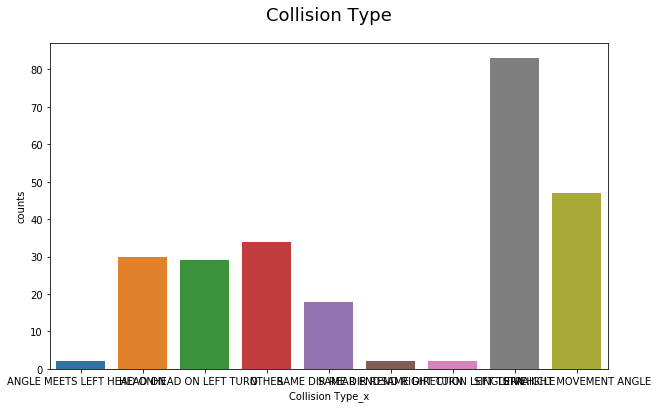

In [303]:
df = New.groupby(['Collision Type_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Collision Type_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Collision Type', fontsize=18, position=(0.5,1.05))

In [306]:
encoding_CollisionType = {"Collision Type_x": 
                            {"SINGLE VEHICLE": 1,
                             "STRAIGHT MOVEMENT ANGLE": 2,
                             "HEAD ON": 3,
                             "HEAD ON LEFT TURN": 4,
                             "SAME DIR REAR END": 5,
                             "SAME DIR REND RIGHT TURN": 6,
                             "SAME DIRECTION LEFT TURN": 7,
                             "ANGLE MEETS LEFT HEAD ON": 8,
                             "OTHER":9,
                             }}
New.replace(encoding_CollisionType, inplace=True)
New['Collision Type_x'].value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

Text(0.5, 1.05, 'Collision Type')

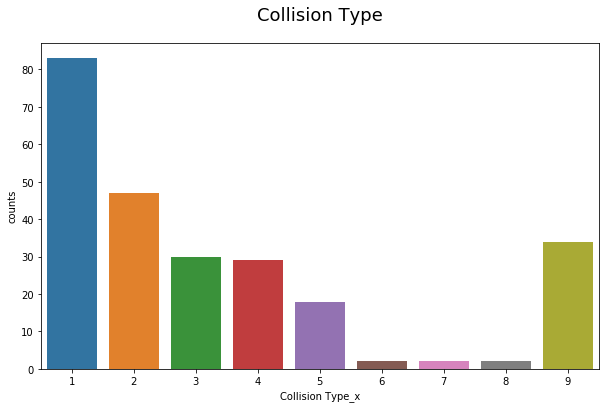

In [307]:
df = New.groupby(['Collision Type_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Collision Type_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Collision Type', fontsize=18, position=(0.5,1.05))

In [308]:
New['Driver Substance Abuse_x'].value_counts() 

NONE DETECTED                 127
UNKNOWN                        98
ALCOHOL PRESENT                12
COMBINED SUBSTANCE PRESENT      4
ALCOHOL CONTRIBUTED             3
ILLEGAL DRUG PRESENT            2
MEDICATION PRESENT              1
Name: Driver Substance Abuse_x, dtype: int64

In [309]:
encoding_DriverAbuse = {"Driver Substance Abuse_x": 
                            {"NONE DETECTED": 1,
                             "UNKNOWN": 1,
                             "ALCOHOL PRESENT": 2,
                             "COMBINED SUBSTANCE PRESENT": 2,
                             "ALCOHOL CONTRIBUTED": 2,
                             "ILLEGAL DRUG PRESENT": 2,
                             "MEDICATION PRESENT": 2,
                             }}
New.replace(encoding_DriverAbuse, inplace=True)
New['Driver Substance Abuse_x'].value_counts()

1    225
2     22
Name: Driver Substance Abuse_x, dtype: int64

In [310]:
New['Driver Substance Abuse_x'].fillna('UNKNOWN', inplace=True)

In [311]:
New['Non-Motorist Substance Abuse_x'].fillna('UNKNOWN', inplace=True)

In [312]:
New['Non-Motorist Substance Abuse_x'].value_counts()

1    239
2      8
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [313]:
New['Route Type_x'].value_counts()

Maryland (State)        148
County                   74
US (State)                9
Municipality              9
UNKNOWN                   5
Other Public Roadway      1
Government                1
Name: Route Type_x, dtype: int64

In [314]:
New['Driver Distracted By'].value_counts()

UNKNOWN                                   182
NOT DISTRACTED                             56
LOOKED BUT DID NOT SEE                      7
TALKING OR LISTENING TO CELLULAR PHONE      1
OTHER DISTRACTION                           1
Name: Driver Distracted By, dtype: int64

In [315]:
encoding_DriverDistract = {"Driver Distracted By": 
                            {"NOT DISTRACTED": 1,
                             "UNKNOWN": 1,
                             "LOOKED BUT DID NOT SEE": 2,
                             "TALKING OR LISTENING TO CELLULAR PHONE": 2,
                             "OTHER DISTRACTION": 2,
                            
                             }}
New.replace(encoding_DriverDistract, inplace=True)
New['Driver Distracted By'].value_counts()

1    238
2      9
Name: Driver Distracted By, dtype: int64

In [316]:
New['Hit/Run'].value_counts()

No     238
Yes      9
Name: Hit/Run, dtype: int64

In [317]:
encoding_hitrun = {"Hit/Run": 
                            {"No": 1,
                             "Yes": 2
                             }}
New.replace(encoding_hitrun, inplace=True)
New['Hit/Run'].value_counts()

1    238
2      9
Name: Hit/Run, dtype: int64

In [318]:
encoding_FirstHarm = {"First Harmful Event": 
                            {"OTHER VEHICLE": 1,
                             "PEDESTRIAN": 2,
                             "FIXED OBJECT": 3,
                             "BICYCLE": 4,
                             "OFF ROAD": 5,
                             "OVERTURN": 5,
                             "UNKNOWN": 5,
                             'OTHER CONVEYANCE':5
                             }}
New.replace(encoding_FirstHarm, inplace=True)
New['First Harmful Event'].value_counts()

1    130
2     65
3     38
5      7
4      7
Name: First Harmful Event, dtype: int64

In [319]:
New['First Harmful Event'].value_counts()

1    130
2     65
3     38
5      7
4      7
Name: First Harmful Event, dtype: int64

In [320]:
New['Vehicle First Impact Location'].value_counts()

TWELVE OCLOCK    157
ELEVEN OCLOCK     14
ONE OCLOCK        12
TWO OCLOCK        10
THREE OCLOCK       9
NINE OCLOCK        8
SIX OCLOCK         7
UNKNOWN            7
EIGHT OCLOCK       6
ROOF TOP           4
FOUR OCLOCK        4
FIVE OCLOCK        3
TEN OCLOCK         3
UNDERSIDE          2
SEVEN OCLOCK       1
Name: Vehicle First Impact Location, dtype: int64

In [321]:
encoding_SecondHarm = {"Second Harmful Event": 
                            {"OTHER VEHICLE": 1,
                             "PEDESTRIAN": 2,
                             "FIXED OBJECT": 3,
                             "EXPLOSION OR FIRE": 4,
                             "OFF ROAD": 5,
                             "OVERTURN": 5,
                             "PARKED VEHICLE": 3,
                             'OTHER OBJECT':3,
                             'FELL JUMPED FROM MOTOR VEHICLE':5,
                             'UNKNOWN': 6}}
New.replace(encoding_SecondHarm, inplace=True)
New['Second Harmful Event'].value_counts()

6    115
3     81
1     26
5     11
2     10
4      4
Name: Second Harmful Event, dtype: int64

In [322]:
## I think 'First Harmful Event' shall be given different weight, need further consideration of how to apply that in model?

In [323]:
New['Surface Condition_x'].value_counts()

DRY        201
WET         34
UNKNOWN      6
SLUSH        4
OTHER        2
Name: Surface Condition_x, dtype: int64

In [324]:
New['Surface Condition_x'].fillna('OTHER', inplace=True)

In [325]:
encoding_surface = {"Surface Condition_x": 
                            {"DRY": 1,
                             "WET": 2,
                             "SLUSH": 2,
                             'OTHER': 1,
                             "UNKNOWN": 1 }}
New.replace(encoding_surface, inplace=True)
New['Surface Condition_x'].value_counts()

1    209
2     38
Name: Surface Condition_x, dtype: int64

In [326]:
## combine wet and slush to one category.

In [327]:
New['Weather_x'].value_counts()

CLEAR           181
UNKNOWN          23
RAINING          20
CLOUDY           19
WINTRY MIX        2
SEVERE WINDS      1
FOGGY             1
Name: Weather_x, dtype: int64

In [328]:
encoding_weather = {"Weather_x": 
                            {"CLEAR": 1,
                             "RAINING": 2,
                             "CLOUDY": 1,
                             "WINTRY MIX": 3,
                             "SEVERE WINDS": 4,
                             "FOGGY": 5,
                            
                             "UNKNOWN": 1}}
New.replace(encoding_weather, inplace=True)
New['Weather_x'].value_counts()

1    223
2     20
3      2
5      1
4      1
Name: Weather_x, dtype: int64

Text(0.5, 1.05, 'Weather Condition')

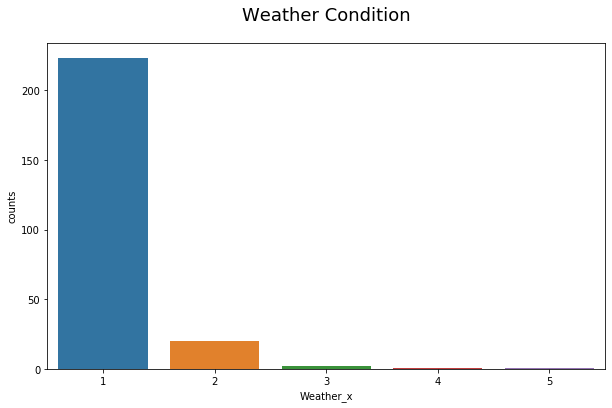

In [329]:
df = New.groupby(['Weather_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Weather_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Weather Condition', fontsize=18, position=(0.5,1.05))

In [330]:
merged1['Crash Time'].head(5)

0    18:47:00
1    15:43:00
2    15:43:00
3    16:46:00
4    19:05:00
Name: Crash Time, dtype: object

In [331]:
def period(row):
    rdf = []
    if(type(row) == float):
        row = str(row)
        rdf = row.split(".")
    else:
        rdf = str(row).split(":"); # day -- 7am-7pm
        
    hr = rdf[0]
    if int(hr) > 7 and int(hr) < 9: # morning rush hour
        return 1;
    if int(hr) > 9 and int(hr) < 16:# day time
        return 2;
    if int(hr) > 16 and int(hr) <19: # afternoon rush hour:
        return 3;
    else: # night
        return 4;

In [332]:
New['Crash Time'] = New['Crash Time'].apply(period)

In [333]:
New['Crash Time'].value_counts()

4    147
2     60
3     35
1      5
Name: Crash Time, dtype: int64

Text(0.5, 1.05, 'Crash Time Distribution')

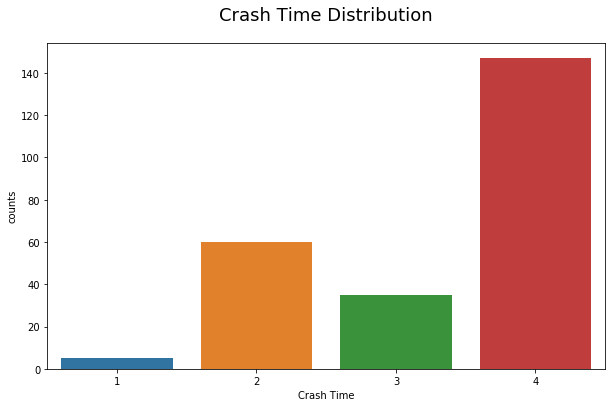

In [334]:
df = New.groupby(['Crash Time']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Crash Time',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Crash Time Distribution', fontsize=18, position=(0.5,1.05))

In [335]:
New["Light_x"].value_counts()

DAYLIGHT                    116
DARK LIGHTS ON               87
DARK NO LIGHTS               24
DUSK                         10
DARK -- UNKNOWN LIGHTING      7
DAWN                          3
Name: Light_x, dtype: int64

In [336]:
New['Light_x'].fillna('UNKNOWN', inplace=True)

In [337]:
encoding_light = {"Light_x": 
                            {"DAYLIGHT": 1,
                             "DARK LIGHTS ON": 2,
                             "DARK NO LIGHTS": 3,
                             "DUSK": 4,
                             "DARK -- UNKNOWN LIGHTING": 3,
                             "DAWN": 4,
                             "UNKNOWN": 1}}
New.replace(encoding_light, inplace=True)
New['Light_x'].value_counts()

1    116
2     87
3     31
4     13
Name: Light_x, dtype: int64

Text(0.5, 1.05, 'Light Condition')

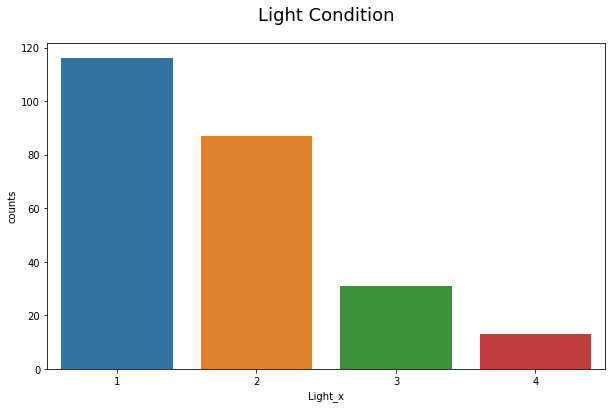

In [338]:
df = New.groupby(['Light_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Light_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Light Condition', fontsize=18, position=(0.5,1.05))

In [339]:
#print(New.columns.values)
print(New.columns.tolist())

['Report Number', 'Agency Name_x', 'ACRS Report Type_x', 'Route Type_x', 'Cross-Street Type_x', 'Related Non-Motorist_x', 'Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Driver Substance Abuse_x', 'Non-Motorist Substance Abuse_x', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude_x', 'Longitude_x', 'Location_x', 'Crash Date', 'Crash Time', 'Hit/Run', 'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Number of Lanes', 'Direction', 'Distance', 'Distance Unit', 'Road Grade', 'NonTraffic', 'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck', 'Junction', 

In [340]:
New['Vehicle Year'].value_counts()

2015    18
2014    18
2012    17
2009    15
2005    15
2011    14
2003    13
2004    13
2006    12
2016    12
2017    11
2002    11
2008    10
2013     9
2007     9
2018     8
2010     6
1997     6
2019     5
2000     5
1999     5
1995     3
1998     3
2020     2
2001     2
0        2
1990     1
1989     1
1984     1
Name: Vehicle Year, dtype: int64

In [341]:
New['Vehicle Make'].value_counts()

TOYOTA             34
HONDA              30
FORD               24
NISSAN             11
CHEV                9
BMW                 9
CHEVROLET           8
LEXUS               7
ACURA               7
TOYT                6
DODGE               6
SUZUKI              6
GMC                 5
HYUNDAI             5
VOLKSWAGEN          5
AUDI                5
JEEP                4
GILLIG              4
SUBARU              3
CADILLAC            3
HARLEY DAVIDSON     3
MERCEDES            3
MACK                3
VOLVO               2
MERZ                2
VOLK                2
THOMAS              2
INFINITI            2
CHEVY               2
TAO TAO             2
KIA                 2
MAZDA               2
UNKNOWN             2
HOND                2
MAZD                1
ROCKBIKE            1
THOM                1
KAWASAKI            1
MITSUBISHI          1
MERCURY             1
HARLEY DAV          1
SCION               1
KTM                 1
TOYTA               1
BUICK               1
VOLKSWAGON

In [342]:
New['Vehicle Model'].value_counts()

CAMRY          14
ACCORD         12
COROLLA         8
CIVIC           7
ALTIMA          4
RAV4            4
BUS             3
PILOT           3
F250            3
UNKNOWN         3
JETTA           3
4S              3
EXPLORER        3
MUSTANG         3
EXPEDITION      3
PASSAT          3
3               3
CRV             2
MDX             2
MALIBU          2
CHEROKEE        2
ESCAPE          2
SONATA          2
TK              2
FUSION          2
ROGUE           2
TAHOE           2
PRIUS           2
RX350           2
TAURUS          2
               ..
RAV-4           1
TRASH           1
ULTRA           1
F3 800          1
TLX             1
COROLA          1
TRASH TRUCK     1
RAM 2500        1
Q7              1
VOLT            1
Q50S            1
ARMADA          1
S6              1
CBR             1
SILVERADO       1
SAVANA          1
A4              1
C-MAX           1
SCOOTER         1
TRAILBLAZER     1
BONNEVILLE      1
BEETLE          1
335I            1
HR-V            1
F-250     

In [343]:
# I decided to drop vehicle year, vehicle model and make. I don't think much trend related to vehicle.

In [344]:
New['Road Division'].value_counts()

TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER           119
TWO-WAY, NOT DIVIDED                                 82
TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET     39
UNKNOWN                                               5
TWO-WAY, NOT DIVIDED WITH A CONTINUOUS LEFT TURN      2
Name: Road Division, dtype: int64

In [345]:
encoding_RoadDivision = {"Road Division": 
                            {"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER": 1,
                             "TWO-WAY, NOT DIVIDED": 2,
                             "TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET": 3,
                             "TWO-WAY, NOT DIVIDED WITH A CONTINUOUS LEFT TURN": 2,
                             
                            
                             "UNKNOWN": 1}}
New.replace(encoding_RoadDivision, inplace=True)
New['Road Division'].value_counts()

1    124
2     84
3     39
Name: Road Division, dtype: int64

In [346]:
New['Road Alignment'].value_counts(normalize= True)

STRAIGHT       0.740891
CURVE RIGHT    0.145749
CURVE LEFT     0.097166
UNKNOWN        0.012146
OTHER          0.004049
Name: Road Alignment, dtype: float64

Text(0.5, 1.05, 'Road Alignment')

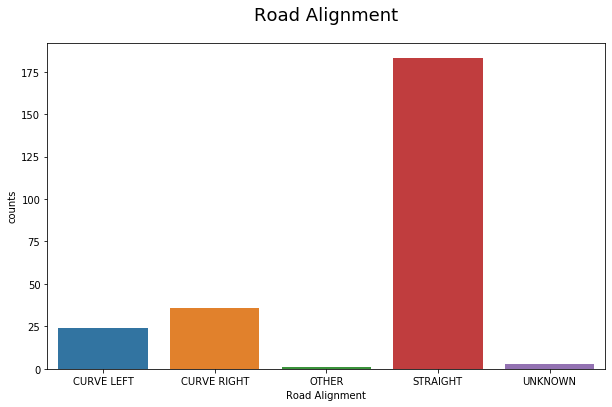

In [347]:
df = New.groupby(['Road Alignment']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Road Alignment',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Road Alignment', fontsize=18, position=(0.5,1.05))

In [348]:
encoding_RoadAlign = {"Road Alignment": 
                            {"STRAIGHT": 1,
                             "CURVE RIGHT": 2,
                             "CURVE LEFT": 3,
                             "UNKNOWN": 4,
                             "OTHER": 4}}
New.replace(encoding_RoadAlign, inplace=True)
New['Road Alignment'].value_counts()

1    183
2     36
3     24
4      4
Name: Road Alignment, dtype: int64

New['Fixed Oject Struck'].value_counts()

In [349]:
New['Direction'].value_counts()

North      107
East        80
South       32
West        24
UNKNOWN      4
Name: Direction, dtype: int64

In [350]:
New['Number of Lanes'].value_counts()

2     84
3     81
1     46
4     16
6     10
10     3
5      3
0      3
7      1
Name: Number of Lanes, dtype: int64

In [351]:
New['Lane Number'].value_counts()

1    131
2     70
3     27
0     18
5      1
Name: Lane Number, dtype: int64

In [352]:
New['Vehicle Movement'].value_counts()

MOVING CONSTANT SPEED      132
UNKNOWN                     45
MAKING LEFT TURN            30
STOPPED IN TRAFFIC LANE      8
ACCELERATING                 5
MAKING RIGHT TURN            4
SLOWING OR STOPPING          4
CHANGING LANES               3
NEGOTIATING A CURVE          3
SKIDDING                     3
LEAVING TRAFFIC LANE         3
ENTERING TRAFFIC LANE        2
MAKING U TURN                2
RIGHT TURN ON RED            1
BACKING                      1
STARTING FROM LANE           1
Name: Vehicle Movement, dtype: int64

In [353]:
New['NonTraffic'].value_counts()

No     244
Yes      3
Name: NonTraffic, dtype: int64

In [354]:
encoding_NonTraffic = {"NonTraffic": 
                           
                            {"No": 1,
                             "Yes": 2,
                           }}
New.replace(encoding_NonTraffic, inplace=True)
New['NonTraffic'].value_counts()

1    244
2      3
Name: NonTraffic, dtype: int64

In [355]:
New['Related Non-Motorist_x'].value_counts()

UNKNOWN             168
PEDESTRIAN           67
BICYCLIST             8
OTHER CONVEYANCE      2
OTHER                 2
Name: Related Non-Motorist_x, dtype: int64

In [356]:
New['At Fault'].value_counts()

UNKNOWN        133
DRIVER          95
NONMOTORIST     16
BOTH             3
Name: At Fault, dtype: int64

In [357]:
encoding_AtFault = {"At Fault": 
                           
                            {"UNKNOWN": 3,
                             "DRIVER": 1,
                             'NONMOTORIST': 2,
                             'BOTH': 1 }}
New.replace(encoding_AtFault, inplace=True)
New['At Fault'].value_counts()

3    133
1     98
2     16
Name: At Fault, dtype: int64

In [359]:
df_train1 = New[['Related Non-Motorist_x', 'Vehicle Year','Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Driver Substance Abuse_x', 'Non-Motorist Substance Abuse_x', 'At Fault', 'Injury Severity', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Equipment Problems', 'Crash Date', 'Crash Time', 'Hit/Run', 'Mile Point', 'Number of Lanes', 'Distance', 'Distance Unit', 'NonTraffic', 'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck', 'Junction', 'Intersection Type', 'Road Alignment', 'Road Division']]

In [360]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 34 columns):
Related Non-Motorist_x            247 non-null object
Vehicle Year                      247 non-null int64
Collision Type_x                  247 non-null int64
Weather_x                         247 non-null int64
Surface Condition_x               247 non-null int64
Light_x                           247 non-null object
Traffic Control_x                 247 non-null int64
Driver Substance Abuse_x          247 non-null int64
Non-Motorist Substance Abuse_x    247 non-null int64
At Fault                          247 non-null int64
Injury Severity                   247 non-null object
Driver Distracted By              247 non-null int64
Vehicle Body Type                 247 non-null object
Vehicle Movement                  247 non-null object
Vehicle Continuing Dir            247 non-null object
Vehicle Going Dir                 247 non-null object
Speed Limit                       247 no

In [361]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in df_train1:
    if df_train1[i].dtype == 'object':
        lblE.fit(df_train1[i])
        df_train1[i] = lblE.transform(df_train1[i])

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [362]:
cols_to_remove = []

for col in df_train1.columns:
    try:
        _ = df_train1[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
df_train = df_train1[[col for col in df_train1.columns if col not in cols_to_remove]]

Couldn't covert Mile Point to float
Couldn't covert Distance to float
Couldn't covert Distance Unit to float
Couldn't covert Fixed Oject Struck to float
Couldn't covert Intersection Type to float


In [384]:
df_train.sample(3)

,Related Non-Motorist_x,Vehicle Year,Collision Type_x,Weather_x,Surface Condition_x,Light_x,Traffic Control_x,Driver Substance Abuse_x,Non-Motorist Substance Abuse_x,At Fault,...,Crash Date,Crash Time,Hit/Run,Number of Lanes,NonTraffic,First Harmful Event,Second Harmful Event,Junction,Road Alignment,Road Division
141,2,2011,1,2,2,2,2,1,2,3,...,92,4,1,2,1,2,6,1,1,3
160,4,2003,2,1,1,0,2,1,1,3,...,90,2,1,2,1,1,6,1,1,1
142,4,2010,1,1,1,0,1,1,1,1,...,61,2,1,2,1,3,3,2,1,2


In [364]:
New['Injury Severity'].value_counts()

NO APPARENT INJURY          99
FATAL INJURY                86
SUSPECTED MINOR INJURY      27
POSSIBLE INJURY             25
SUSPECTED SERIOUS INJURY    10
Name: Injury Severity, dtype: int64

In [365]:
encoding_Severity = {"Injury Severity": 
                           
                            {"NO APPARENT INJURY": 3,
                             "FATAL INJURY": 1,
                             'SUSPECTED MINOR INJURY': 2,
                             'POSSIBLE INJURY': 2,
                            'SUSPECTED SERIOUS INJURY': 1}}
New.replace(encoding_Severity, inplace=True)
New['Injury Severity'].value_counts()

3    99
1    96
2    52
Name: Injury Severity, dtype: int64

In [366]:
df_test = New[['Injury Severity']]

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2)

In [388]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[14  2  1]
 [ 3  6  4]
 [ 5  0 15]]
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        17
           2       0.75      0.46      0.57        13
           3       0.75      0.75      0.75        20

    accuracy                           0.70        50
   macro avg       0.71      0.68      0.68        50
weighted avg       0.71      0.70      0.69        50

Accuracy: 0.7


C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [389]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(n_estimators=300,random_state=35)

rdf.fit(X_train,y_train)

y_pred=rdf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy: 0.92
[[16  1  0]
 [ 0 10  3]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.91      0.77      0.83        13
           3       0.87      1.00      0.93        20

    accuracy                           0.92        50
   macro avg       0.93      0.90      0.91        50
weighted avg       0.92      0.92      0.92        50



In [390]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(bootstrap=True,
            class_weight="balanced_subsample", 
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=True,
            random_state=35,
            verbose=0, warm_start=False)

In [391]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[16  1  0]
 [ 0 10  3]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.91      0.77      0.83        13
           3       0.87      1.00      0.93        20

    accuracy                           0.92        50
   macro avg       0.93      0.90      0.91        50
weighted avg       0.92      0.92      0.92        50

Accuracy: 0.92
